### <center>Machine Learning </center>
### <center> Experiment 4.2: Simple and Multiple Linear Regression using sklearn</center>

**Aim:** To Implement simple and Multiple linear regression using sklearn.

**Prerequisites:** Concepts of simple and Multiplelinear regression, practical knowledge of working with dataframes using pandas, sklearn

**Outcome:** After completion of this experiment students will be able to build linear regression model using sklearn.

### Theory

#### Linear Regression

Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x).
When there is a single input variable (x), the method is referred to as simple linear regression. When there are multiple input variables, literature from statistics often refers to the method as multiple linear regression. Different techniques can be used to prepare or train the linear regression equation from data, the most common of which is called Ordinary Least Squares. Both the input values (x) and the output value are numeric. The linear equation assigns one scale factor to each input value or column, called a coefficient and represented by the capital Greek letter Beta (B). One additional coefficient is also added, giving the line an additional degree of freedom (e.g. moving up and down on a two-dimensional plot) and is often called the intercept or the bias coefficient.

For example, in a simple regression problem (a single x and a single y), the form of the model would be: y(pred) = B0 + B1*x.

In higher dimensions when we have more than one input (x), the line is called a plane or a hyper-plane. The representation therefore is the form of the equation and the specific values used for the coefficients. When a coefficient becomes zero, it effectively removes the influence of the input variable on the model and therefore from the prediction made from the model (0 * x = 0).

Learning a linear regression model means estimating the values of the coefficients used in the representation with the data that we have available.
The core idea is to obtain a line that best fits the data. The best fit line is the one for which total prediction error (all data points) are as small as possible. Error is the distance between the point to the regression line.

For simple linear regression, y(pred) = b0 + b1*x. The values b0 and b1 must be chosen so that they minimize the error. If sum of squared error is taken as a metric to evaluate the model, then goal to obtain a line that best reduces the error.
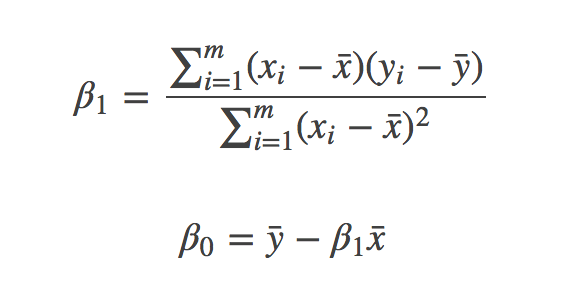

If b1 > 0, then x(predictor) and y(target) have a positive relationship. That is increase in x will increase y.
If b1 < 0, then x(predictor) and y(target) have a negative relationship. That is increase in x will decrease y.

If the model does not include x i.e. x=0, then the prediction will become meaningless with only b0. For example, we have a dataset that relates height(x) and weight(y). Taking x=0(that is height as 0), will make equation have only b0 value which is completely meaningless as in real-time height and weight can never be zero. This resulted due to considering the model values beyond its scope.

If the model includes value 0, then ‘b0’ will be the average of all predicted values when x=0. But, setting zero for all the predictor variables is often impossible.
The value of b0 guarantee that residual have mean zero. If there is no ‘b0’ term, then regression will be forced to pass over the origin. Both the regression co-efficient and prediction will be biased.

When we have more than one input we can use Ordinary Least Squares to estimate the values of the coefficients.

The Ordinary Least Squares procedure seeks to minimize the sum of the squared residuals. This means that given a regression line through the data we calculate the distance from each data point to the regression line, square it, and sum all of the squared errors together. This is the quantity that ordinary least squares seeks to minimize.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
%matplotlib inline

In [2]:
# Read automobileEDA.csv as dataframe
data=pd.read_csv('automobileEDA.csv')

In [3]:
# Display first few rows
data.head(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,110.0,5500.0,19,25,15250.0,12.368421,Medium,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,17710.0,12.368421,Medium,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,18920.0,12.368421,Medium,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,...,8.3,140.0,5500.0,17,20,23875.0,13.823529,Medium,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,...,8.8,101.0,5800.0,23,29,16430.0,10.217391,Low,0,1


In [4]:
data.tail()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0
200,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,19,25,22625.0,12.368421,Medium,0,1


In [5]:
# Display no. of records and no. of features in dataframe
data.shape

(201, 29)

In [6]:
# check datatypes of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

### Simple Linear Regression
LinearRegression from sklearn.linear_model  is used to fit linear regression model.
LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.
https://scikit-learn.org/stable/modules/linear_model.html

In [7]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [8]:
X = data[['highway-mpg']]
Y = data['price']
#Fit the linear model using highway-mpg
lm.fit(X,Y)# training data is passed to fit method

LinearRegression()

In [9]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

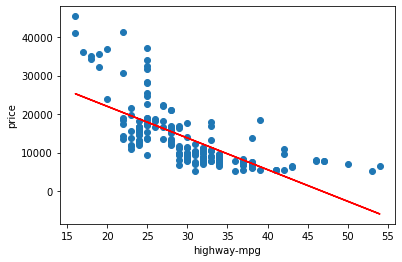

In [10]:
# plot regression model
plt.scatter(data['highway-mpg'],Y)# X,Y
plt.plot(data['highway-mpg'],Yhat,color='red')
plt.xlabel('highway-mpg')
plt.ylabel('price')
plt.show()

In [ ]:
print(lm.intercept_)
print(lm.coef_)

In [ ]:
lm1 = LinearRegression()
X = data[['engine-size']]
Y = data['price']
lm1.fit(X,Y)

In [ ]:
Yhat=lm1.predict(X)
Yhat[0:5]

In [ ]:
# plot regression model
plt.scatter(data['engine-size'],Y)
plt.plot(data['engine-size'],Yhat,color='red')
plt.show()

In [ ]:
print(lm1.intercept_)
print(lm1.coef_)

### Multiple Linear Regression

In multiple linear regression, the dependent variable depends on more than one independent variables.
 
For multiple linear regression, the form of the model is-
Y = β0 + β1X1 + β2X2 + β3X3 + …… + βnXn
Y is a dependent variable.
X1, X2, …., Xn are independent variables.
β0, β1,…, βn are the regression coefficients.
βj (1<=j<=n) is the slope or weight that specifies the factor by which Xj has an impact on Y.

In [ ]:
Z = data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
#Fit the linear model
lm.fit(Z, data['price'])

In [ ]:
print(lm.intercept_)
print(lm.coef_)

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(x='horsepower',y='price',data=data)
plt.ylim(0,)

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(x="peak-rpm", y="price", data=data) #Plot data and a linear regression model fit.
plt.ylim(0,)

In [ ]:
data[['peak-rpm','highway-mpg','price']].corr()

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.residplot(x="peak-rpm", y="price", data=data)
plt.ylim(0,)

In [ ]:
Yhat = lm.predict(Z)
plt.figure(figsize=(width,height))
ax1=sns.distplot(data['price'],hist=False,color="r",label="Actual Values")
sns.distplot(Yhat,hist=False,color="b")

Exercise:
1. Fit simple linear regression model for any one numeric independent variable except the two which are considered in this lab manual
2. Calculate R2 value for the model fitted in Q.1
3. Fit multiple linear regression model for any set of independent features except the one which is considered in this lab manual
4. Calculate R2 value for the model fitted in Q.3